An Electro Cardio Gram (ECG) is a simple test that can can be used to check you heart rhythm nad electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4]

* N: Non Ectopic beats (Normal beats)
* S: Supraventrical ectopic beats
* V: Ventricular ectopic beats
* F: Fusion beats
* Q: Unknown beats

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading dataset
train_data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header = None)
test_data = pd.read_csv("../input/heartbeat/mitbih_test.csv", header = None)

In [4]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Exploratory Data Analysis**

In [6]:
# checking null values
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [8]:
# casting into int
train_data[187] = train_data[187].astype('int')

In [9]:
test_data[187] = test_data[187].astype('int') 

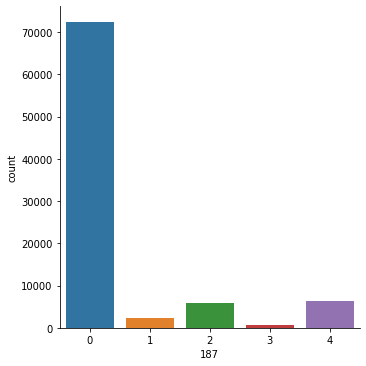

In [10]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_data)

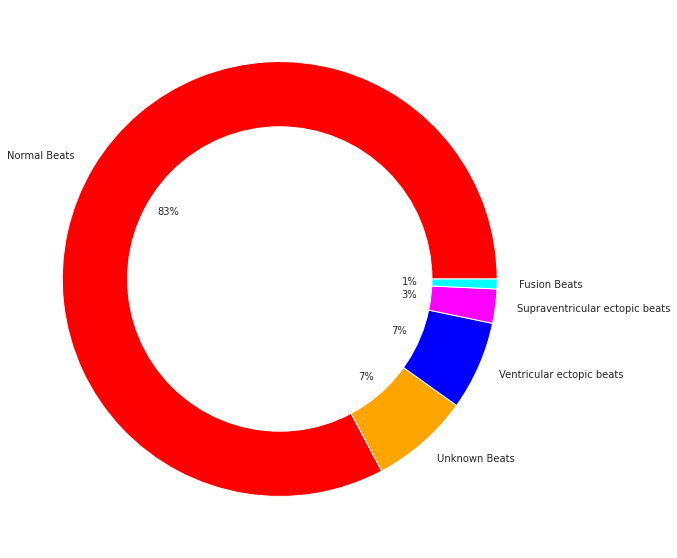

In [18]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

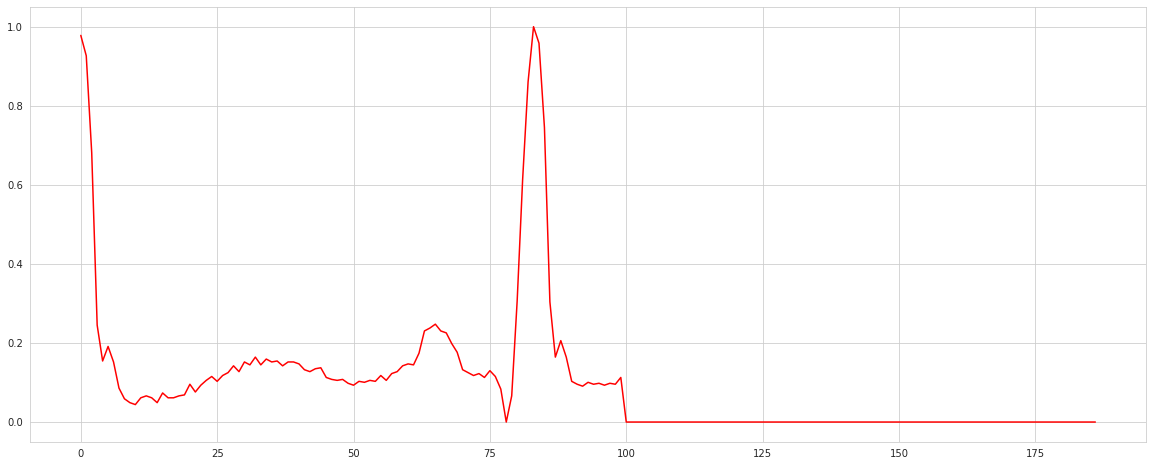

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

In [14]:
# Splitting data into Each Classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

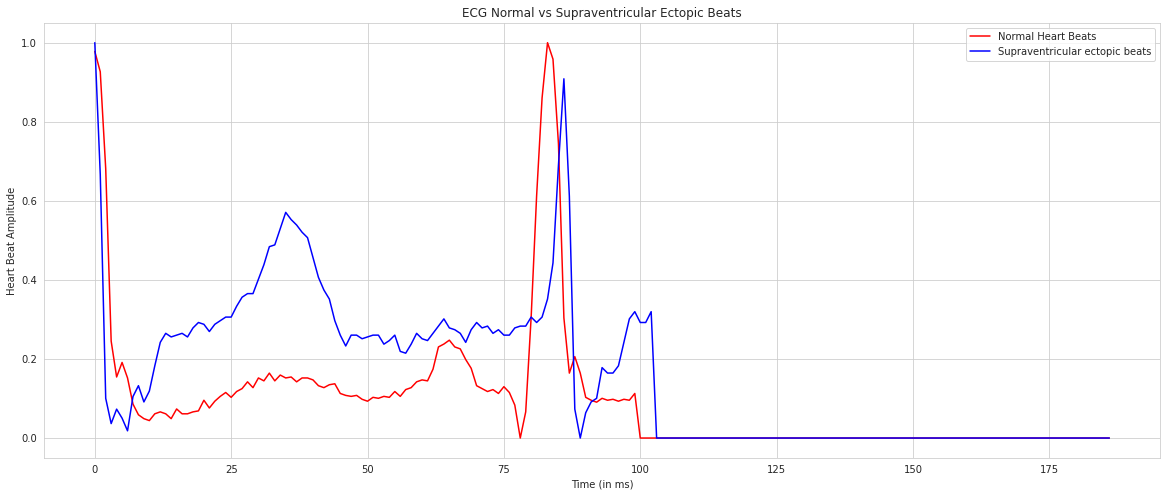

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

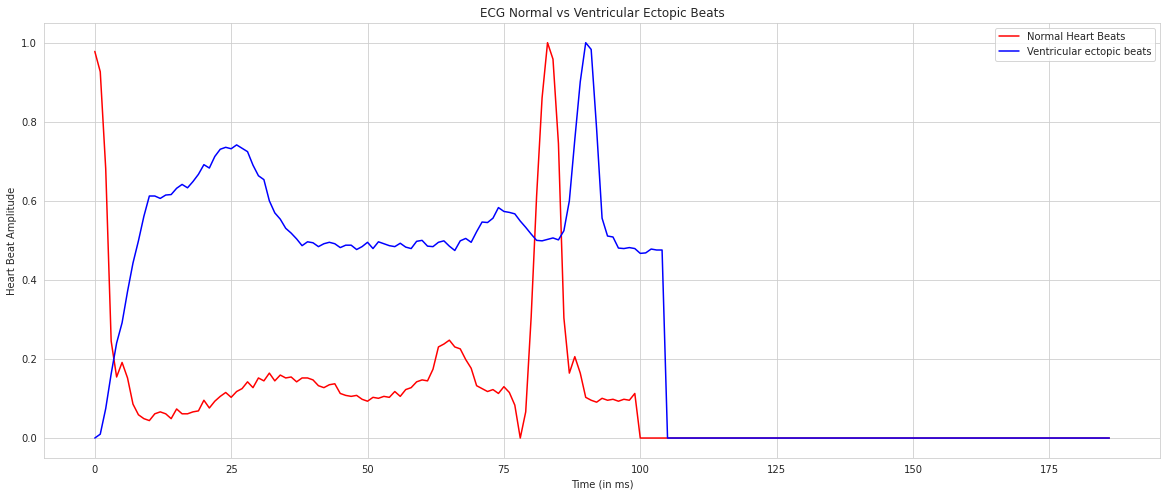

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Data Augmentation**
* Since data is biased we will upsample it

In [28]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [34]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df_0 = train_data[train_data[187]==0].sample(n =20000, random_state=123)

In [35]:
# merge and all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

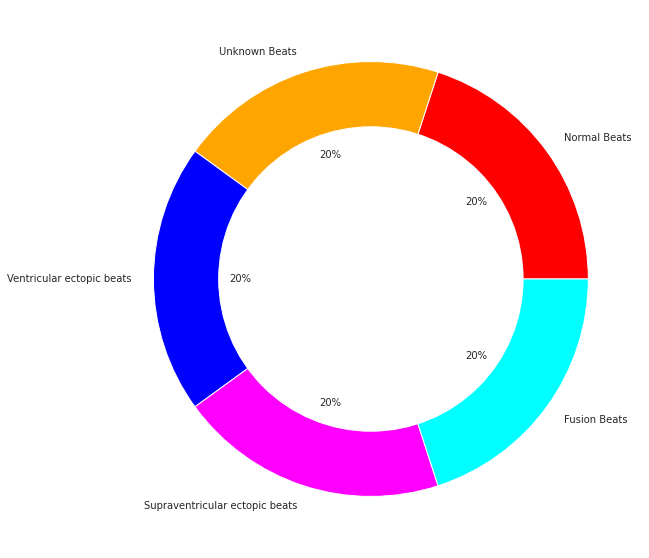

In [36]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

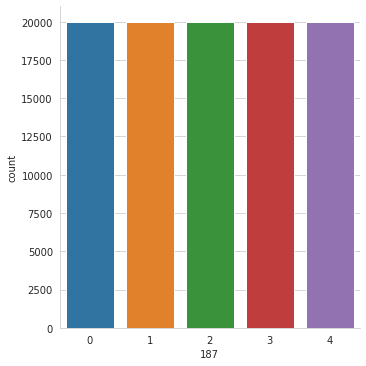

In [37]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [38]:
# target Y
target_train = train_df[187]
target_test = test_data[187]

In [40]:
target_train.unique()

array([0, 1, 2, 3, 4])

This is not good for classification, we always convert them into catagorical one hot encoding

In [41]:
# convert integer values into categorical one hot encoding
# Class 1 - [0,1,0,0,0]
# Class 4 - [0,0,0,0,1]

In [42]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [43]:
y_test = to_categorical(target_test)

In [44]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

This will work good with ANN Classification

In [46]:
# this data is in single dimension, 1D (no of samples, features)
X_train.shape

(100000, 187)

In [51]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [52]:
X_train.shape

(100000, 187, 1)

**CNN - Conv1D**

In [56]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from keras.layers.normalization import BatchNormalization

In [63]:
def build_model():
    model = Sequential()
    
    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1
    
    # Normalization to avoid overfitting
    model.add(BatchNormalization())
    
    # Pooling 
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten 
    model.add(Flatten())

    # Fully connected layer
    # input layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [64]:
model = build_model()

In [67]:
# This is for one sample, i.e. one row
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 187, 64)           448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_5 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 47, 64)           

In [72]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/15
3125/3125 [==============================] - 98s 31ms/step - loss: 0.2915 - accuracy: 0.8944 - val_loss: 0.1533 - val_accuracy: 0.9501
Epoch 2/15
3125/3125 [==============================] - 97s 31ms/step - loss: 0.0783 - accuracy: 0.9727 - val_loss: 0.2435 - val_accuracy: 0.9219
Epoch 3/15
3125/3125 [==============================] - 98s 31ms/step - loss: 0.0482 - accuracy: 0.9836 - val_loss: 0.1588 - val_accuracy: 0.9519
Epoch 4/15
3125/3125 [==============================] - 98s 31ms/step - loss: 0.0393 - accuracy: 0.9869 - val_loss: 0.1413 - val_accuracy: 0.9641
Epoch 5/15
3125/3125 [==============================] - 98s 31ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.1303 - val_accuracy: 0.9682
Epoch 6/15
3125/3125 [==============================] - 97s 31ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.1081 - val_accuracy: 0.9739
Epoch 7/15
3125/3125 [==============================] - 97s 31ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.1836 -

**Accuracy of the model comes out to be 0.9975!**

In [73]:
# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 [==============================] - 5s 7ms/step - loss: 0.1358 - accuracy: 0.9787


[0.13580378890037537, 0.9786680340766907]

<AxesSubplot:>

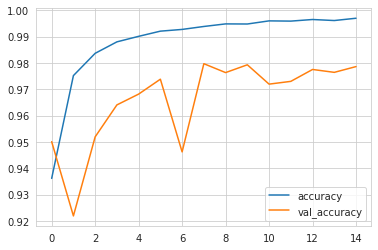

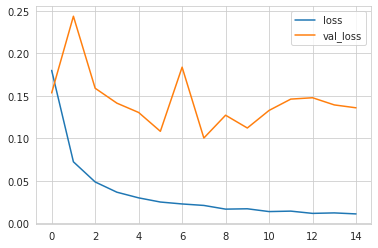

In [74]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [75]:
# Make Prediction
predict = model.predict(X_test)

In [76]:
# Predicted o/p will be in probability distribution 
predict

array([[9.9999988e-01, 1.2993149e-07, 1.0543417e-09, 2.5376616e-09,
        1.1427291e-14],
       [9.9999595e-01, 6.2978572e-08, 3.5306391e-06, 4.0125357e-07,
        8.0092404e-09],
       [1.0000000e+00, 1.3153331e-11, 2.5572711e-10, 4.0587157e-13,
        2.7221731e-15],
       ...,
       [9.2189820e-21, 2.1699380e-33, 2.5291181e-32, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [3.1187510e-29, 1.1781234e-27, 1.2454183e-29, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [77]:
# distributional probability to integers
yhat = np.argmax(predict, axis = 1)

**Checking the confusion matrix and classification report**

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

array([[17826,   150,    82,    25,    35],
       [   67,   477,     7,     2,     3],
       [   22,     5,  1387,    30,     4],
       [   11,     0,     9,   140,     2],
       [   11,     0,     2,     0,  1595]])

<AxesSubplot:>

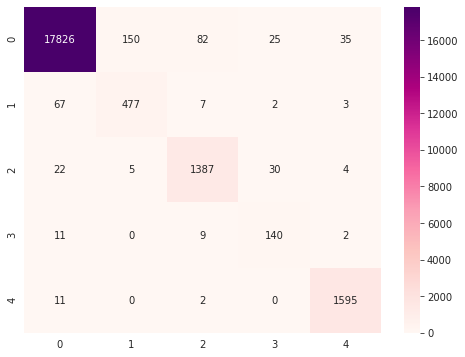

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'RdPu')

In [83]:
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.75      0.86      0.80       556
           2       0.93      0.96      0.95      1448
           3       0.71      0.86      0.78       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.87      0.93      0.90     21892
weighted avg       0.98      0.98      0.98     21892

